In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [149]:
gateway = pd.read_csv('C:/Users/wanru/OneDrive - Ecolab/Desktop/tlm_analysis/data/raw/06_30_2020_tank_gateway_data_for_WH102_and_WL146.csv')
controller = pd.read_csv('C:/Users/wanru/OneDrive - Ecolab/Desktop/tlm_analysis/data/raw/06_30_2020_tank_controller_data_for_WH102_and_WL146.csv')
facility = pd.read_csv('C:/Users/wanru/OneDrive - Ecolab/Desktop/tlm_analysis/data/raw/06_30_2020_tank_facility_data_for_WH102_and_WL146.csv')


In [4]:
gateway.head()

,TankID,MeasurementDate,Value
0,1282,2018-05-13,8.129432
1,1282,2018-05-14,7.796567
2,1282,2018-05-15,7.796567
3,1282,2018-05-16,7.685612
4,1282,2018-05-17,24.402829


In [52]:
gt_features = gateway.groupby('TankID', as_index=False).min()
gt_features = gt_features.rename(columns={"TankID": "TankID", "Value": "MinValue"})
gt_features['Negative'] = gt_features.MinValue.apply(lambda x: 1 if x <0 else 0)
gt_features['Duration'] = gateway.groupby('TankID',as_index = False)['Value'].apply(lambda x: (x<0).sum())
gt_features.head()

,TankID,MeasurementDate,MinValue,Negative,Duration
0,1282,2018-05-13,4.849024,0,0
1,4729,2018-05-13,-128.507985,1,97
2,4730,2018-05-13,20.427499,0,0
3,4731,2018-05-13,-0.977248,1,1
4,4732,2018-05-13,19.099312,0,0


In [57]:
ct_features = controller.groupby('TankID', as_index=False).min()
ct_features = ct_features.rename(columns={"TankID": "TankID", "Value": "MinValue"})
ct_features['Negative'] = ct_features.MinValue.apply(lambda x: 1 if x <0 else 0)
ct_features['Duration'] = controller.groupby('TankID',as_index = False)['Value'].apply(lambda x: (x<0).sum())
ct_features.head()

,TankID,MeasurementDate,MinValue,Negative,Duration
0,30850,2018-05-13,0.000000,0,0
1,30851,2018-07-23,0.000000,0,0
2,30852,2018-05-13,0.000000,0,0
3,34507,2018-05-13,4.300286,0,0
4,34508,2018-05-13,6.136925,0,0


In [134]:
print(gt_features[gt_features['Duration']>100])

     TankID MeasurementDate     MinValue  Negative  Duration
8      5270      2018-05-13   -73.481110         1       182
19     9922      2018-05-13   -92.855394         1       185
30    10982      2018-05-13    -1.294918         1       207
33    10996      2018-05-13   -85.538032         1       132
34    10998      2018-05-13   -34.680101         1       589
35    11027      2018-05-13  -114.721525         1       741
37    11029      2018-05-13  -127.011525         1       741
38    11030      2018-05-13   -97.300340         1       741
39    11320      2018-07-02 -1075.916271         1       101
40    11357      2018-05-13   -80.583052         1       688
41    11473      2018-05-13  -109.221932         1       129
44    11908      2018-05-13  -192.387790         1       119
53    12201      2018-05-13   -95.577647         1       302
61    12793      2018-05-13  -290.920994         1       155
62    12794      2018-05-13  -285.160239         1       123
63    12817      2018-05

Text(0.5, 1.0, 'clustering gateway tanks')

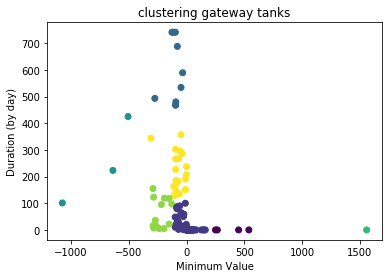

In [135]:
random_state = 20
y_pred = KMeans(n_clusters=7, random_state=random_state).fit_predict(gt_features[['MinValue','Duration']])
plt.scatter(gt_features.MinValue,gt_features.Duration,c=y_pred)
plt.xlabel("Minimum Value")
plt.ylabel("Duration (by day)")
plt.title("clustering gateway tanks")
#Exclude: 11027,11029,11030  (Value didn't change)
# min (-100,), duration <100

Text(0.5, 1.0, 'clustering gateway tanks')

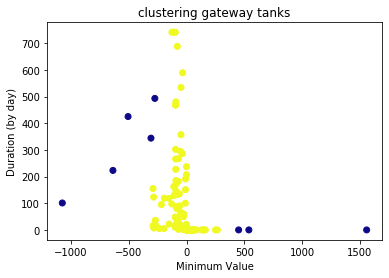

In [131]:
X = gt_features[['MinValue','Duration']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.8, min_samples = 3)
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(gt_features.MinValue,gt_features.Duration, c=clusters,cmap="plasma")
plt.xlabel("Minimum Value")
plt.ylabel("Duration (by day)")
plt.title("clustering gateway tanks")

Text(0.5, 1.0, 'clustering controller tanks')

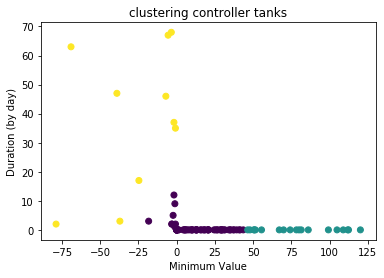

In [103]:
random_state = 10
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(ct_features[['MinValue','Duration']])
plt.scatter(ct_features.MinValue,ct_features.Duration,c=y_pred)
plt.xlabel("Minimum Value")
plt.ylabel("Duration (by day)")
plt.title("clustering controller tanks")
#containing negative value: 
#40284 40886 179925 223294 223295 223299 223301 224328 224726 227513 228669 228670 301187 301752 301753 374311 374543 387131 

# MIN > -25

Text(0.5, 1.0, 'clustering controller tanks')

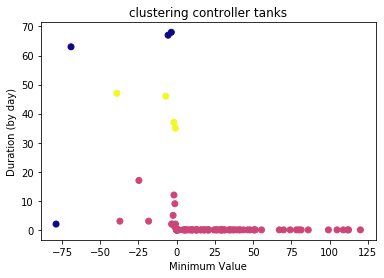

In [129]:
X = ct_features[['MinValue','Duration']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=1, min_samples = 3)
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(ct_features.MinValue,ct_features.Duration, c=clusters,cmap="plasma")
plt.xlabel("Minimum Value")
plt.ylabel("Duration (by day)")
plt.title("clustering controller tanks")

In [136]:
gt_features[(gt_features['MinValue'] > -100) & (gt_features['Duration'] < 100)]

,TankID,MeasurementDate,MinValue,Negative,Duration
0,1282,2018-05-13,4.849024,0,0
2,4730,2018-05-13,20.427499,0,0
3,4731,2018-05-13,-0.977248,1,1
4,4732,2018-05-13,19.099312,0,0
5,4733,2018-05-13,-93.370810,1,19
...,...,...,...,...,...
168,375013,2018-05-13,51.223663,0,0
169,375414,2018-05-13,5.134634,0,0
170,386783,2020-01-07,0.277373,0,0
171,387170,2019-03-21,-86.650540,1,83


In [141]:
gt_tanks = gt_features[(gt_features['MinValue'] > -100) & (gt_features['Duration'] < 100)].TankID.unique()

In [140]:
ct_tanks = ct_features[(ct_features['MinValue'] > -25)].TankID.unique()

In [142]:
#Subset datasets
gt_sub = gateway[gateway['TankID'].isin(gt_tanks)]


In [143]:
ct_sub = controller[controller['TankID'].isin(ct_tanks)]


In [145]:
gt_sub.shape

(89571, 3)

In [146]:
gateway.shape

(121525, 3)

In [152]:
good_tanks = np.concatenate([gt_tanks,ct_tanks])
facility_sub = facility[facility['TankID'].isin(good_tanks)]
print(facility.shape,facility_sub.shape)

(276, 59) (222, 59)


In [164]:
gt_sub.to_csv('C:/Users/wanru/OneDrive - Ecolab/Desktop/tlm_analysis/data/processed/07-08-20-gateway-subset.csv',index=False)
ct_sub.to_csv('C:/Users/wanru/OneDrive - Ecolab/Desktop/tlm_analysis/data/processed/07-08-20-controller-subset.csv',index=False)
facility_sub.to_csv('C:/Users/wanru/OneDrive - Ecolab/Desktop/tlm_analysis/data/processed/07-08-20-facility-subset.csv',index=False)

In [154]:
gt_sub.head()

,TankID,MeasurementDate,Value
0,1282,2018-05-13,8.129432
1,1282,2018-05-14,7.796567
2,1282,2018-05-15,7.796567
3,1282,2018-05-16,7.685612
4,1282,2018-05-17,24.402829


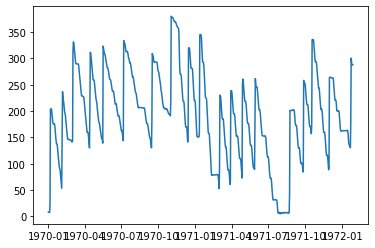

In [159]:
plt.plot(gt_sub[gt_sub.TankID==1282].index.values.astype('M8[D]'), gt_sub[gt_sub.TankID==1282].Value)

In [165]:
gt_sub.head()

,TankID,MeasurementDate,Value
0,1282,2018-05-13,8.129432
1,1282,2018-05-14,7.796567
2,1282,2018-05-15,7.796567
3,1282,2018-05-16,7.685612
4,1282,2018-05-17,24.402829


In [162]:
gateway.head()

,TankID,MeasurementDate,Value
0,1282,2018-05-13,8.129432
1,1282,2018-05-14,7.796567
2,1282,2018-05-15,7.796567
3,1282,2018-05-16,7.685612
4,1282,2018-05-17,24.402829
